## HOUSE PRICING PREDICT
- Dalam kasus ini, kita akan memprediksi harga rumah dengan kriteria berikut:
- Terdapat 4 kamar
- Terdapat 3 kamar mandi
- Dengan ukuran 2570 Sqft_living
- Dengan grade 8
- 2 Lantai
- Tahun pembelian 2005

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [95]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
raw_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [96]:
#data drop = membuat variable yang tidak ingin digunakan
# data head = menampilkan 6 data teratas
data = raw_data.copy()
data = data.drop(['id','date','sqft_lot','waterfront','view','condition','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],axis = 1)
data.head(6)

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
0,221900,3,1.00,1180,1.0,7,1955
1,538000,3,2.25,2570,2.0,7,1951
2,180000,2,1.00,770,1.0,6,1933
3,604000,4,3.00,1960,1.0,7,1965
4,510000,3,2.00,1680,1.0,8,1987
5,1225000,4,4.50,5420,1.0,11,2001


In [97]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 7 kolom (features) dengan 21613 baris
data.shape

(21613, 7)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   grade        21613 non-null  int64  
 6   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [99]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,13.000000,2015.000000


In [100]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include = 'all')

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,13.000000,2015.000000


In [101]:
# mengganti tipe data menjadi int agar dapat dibaca ketika pembuatan chart.. dapat coba di hilangkan code ini jika
# ingin melihat perbedaan pada chart bathrooms
data['bathrooms'] = data['bathrooms'].astype('int')

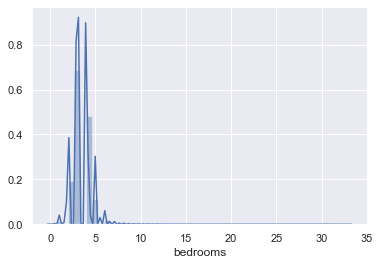

In [102]:
# merubah outlier pada bedrooms
sns.distplot(data_no_mv['bedrooms'])

In [103]:
q = data_no_mv['bedrooms'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['bedrooms']<q]
data_1.describe(include = 'all')

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
count,2.127900e+04,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000
mean,5.352174e+05,3.323652,2.098090,2059.341228,1.492128,7.649796,1971.146858
std,3.545496e+05,0.832024,0.751016,893.573061,0.539707,1.170378,29.340795
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1900.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,1.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,1.500000,7.000000,1975.000000
75%,6.399000e+05,4.000000,2.500000,2520.000000,2.000000,8.000000,1997.000000
max,7.062500e+06,5.000000,6.750000,10040.000000,3.500000,13.000000,2015.000000


In [104]:
data.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
grade          0
yr_built       0
dtype: int64

# Exploratory Data Analyst 

In [105]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
0,221900,3,1,1180,1.0,7,1955
1,538000,3,2,2570,2.0,7,1951
2,180000,2,1,770,1.0,6,1933
3,604000,4,3,1960,1.0,7,1965
4,510000,3,2,1680,1.0,8,1987


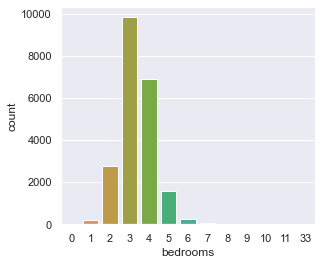

In [106]:
bdrms = data['bedrooms']
bdrms = plt.figure(figsize= (10,4))

bdrms.add_subplot(1,2,1)
sns.countplot(data['bedrooms'])

- Pada histogram diatas, menjelaskan bahwa kamar terbanyak yaitu sebanyak 3 hingga 4
- Tidak terdapat rumah dengan 0 kamar

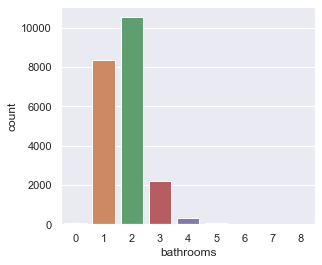

In [110]:
bthrs = data['bathrooms']
bthrs = plt.figure(figsize= (10,4))

bthrs.add_subplot(1,2,1)
sns.countplot(data['bathrooms'])

- Jumlah kamar mandi paling banyak berada pada angka 1 dan 2.
- Terdapat nilai outlier 

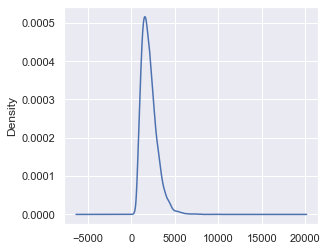

In [88]:
luas_tanah = plt.figure(figsize=(10,4))

luas_tanah.add_subplot(1,2,1)
data['sqft_living'].plot(kind='kde')

- Density dari distribusi luas rumah terdapat pada range 0-5000 atau lebih tepatnya 2000an

In [90]:
# ts = pd.Series(np.random.randn(1000),
#                 index=pd.date_range('1/1/2000', periods=1000))


# ts = ts.cumsum()
# ts.plot()
# data = pd.DataFrame(np.random.randn(1000, 4),
#                 index=ts.index, columns=list('ABCD'))


# data = data.cumsum()
# plt.figure();
# data.plot();

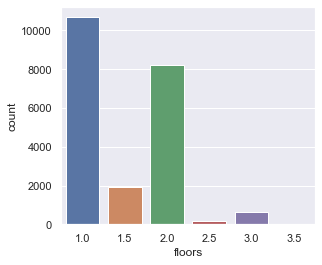

In [86]:
flr = data['floors']
flr = plt.figure(figsize= (10,4))

flr.add_subplot(1,2,1)
sns.countplot(data['floors'])

- Banyak Rumah dengan Lantai 1 dan 2
- Terdapat Outlier

<ipython-input-18-ebea9d4551a6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  flr.add_subplot(1,2,1)


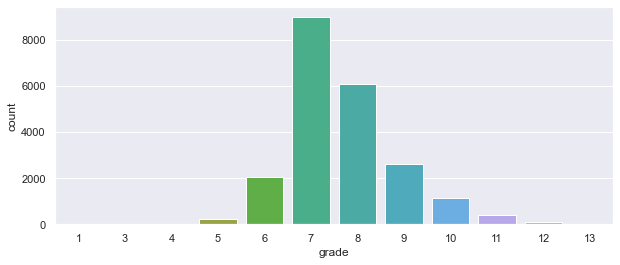

In [18]:
grd = data['grade']
grd = plt.figure(figsize= (10,4))

flr.add_subplot(1,2,1)
sns.countplot(data['grade'])

- Sebagian besar rumah memiliki grade 7 dan 8
- Masih terdapat outlier

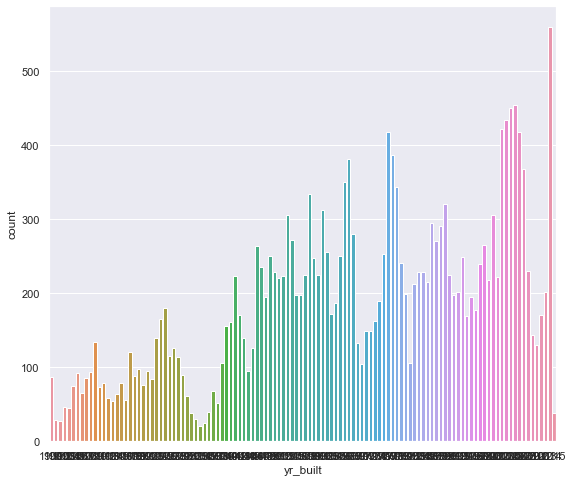

In [19]:
year = plt.figure(figsize=(20,8))

year.add_subplot(1,2,1)
sns.countplot(data['yr_built'])

<Figure size 864x720 with 0 Axes>

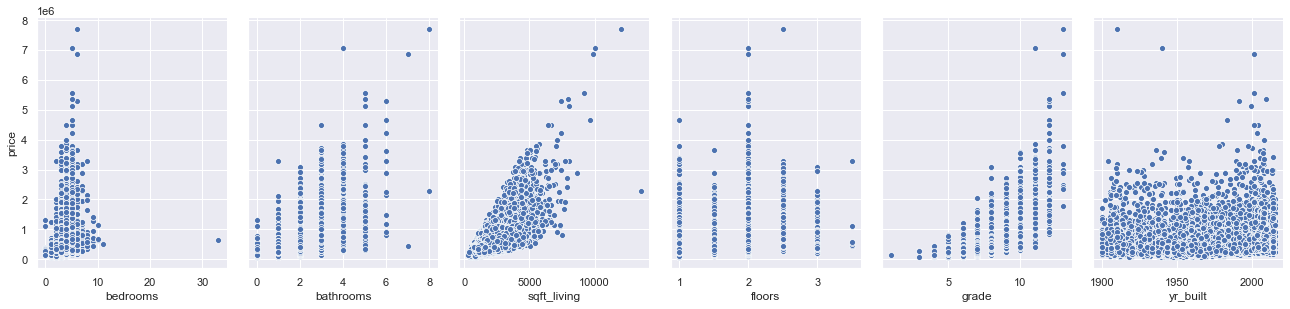

In [50]:
# #Bivariate analysis 
plt.figure(figsize=(12,10))
sns.pairplot(
    data,
    x_vars=['bedrooms', 'bathrooms', 'sqft_living','floors','grade', 'yr_built'],
    y_vars=['price'],
    size=4, aspect=0.75
)
plt.show()

Hubungan antara variabel dependent dengan independent

# Build Machine Learning

In [83]:
# Mencari nilai korelasi dari independent dan dependent variable
# data.corr().style.background_gradient().set_precision(3)
data.corr().style.set_properties(**{'background-color': '',
                           'color': 'black',
                           'border-color': 'red'})

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
price,1.000000,0.308350,0.510072,0.702035,0.256794,0.667434,0.054012
bedrooms,0.308350,1.000000,0.467452,0.576671,0.175429,0.356967,0.154178
bathrooms,0.510072,0.467452,1.000000,0.697875,0.473840,0.606631,0.433647
sqft_living,0.702035,0.576671,0.697875,1.000000,0.353949,0.762704,0.318049
floors,0.256794,0.175429,0.473840,0.353949,1.000000,0.458183,0.489319
grade,0.667434,0.356967,0.606631,0.762704,0.458183,1.000000,0.446963
yr_built,0.054012,0.154178,0.433647,0.318049,0.489319,0.446963,1.000000


In [111]:
# deklarasi variabel x dan y
x = data.drop(['price'], axis = 1)
y = data['price']

In [112]:
# As you can see from the code, we have split the dataset in a 80–20 ratio, which is a common practice in data science
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [113]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 6)
(17290,)
(4323, 6)
(4323,)


In [114]:
lin_reg = LinearRegression()

In [115]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [116]:
# slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-47209.13667768  59585.55646343    186.58674528  17545.1827624
 130229.82763292  -4061.37403249]
7188548.593964215


In [117]:
coef_dict = {
    'Features': x.columns,
    'Coefficient':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['Features', 'Coefficient'])
coef

,Features,Coefficient
0,bedrooms,-47209.136678
1,bathrooms,59585.556463
2,sqft_living,186.586745
3,floors,17545.182762
4,grade,130229.827633
5,yr_built,-4061.374032


In [118]:
y_pred = lin_reg.predict(x_test)

In [119]:
# Accuracy score dari model menggunakan testing data yang telah displit
lin_reg.score(x_test, y_test)

0.6132913818599679

# Prediction
Kembali sesuai dengan permintaan diawal, memprediksi harga rumah sesuai dengan kriteria
- kamar tidur 4
- bathrooms 3
- luas 2570
- 2 lantai
- grade 8
- tahun 2005

In [120]:
lin_reg.predict([[4,3,2570,2,8,2005]])

array([591870.70345776])

Prediksi harga rumah sekitar 591.870$ dengan 4kamar tidur, 3bathrooms, luas 2570, 2lantai, grade 8 dan tahun 2005